Purpose: For the putative upregulated core stress set found via set operations (upregulated = TN-ratio/fold change >2), 4 enriched GO terms were found, all having to do with regulation. Test whether this set is enriched in transcription factors.<br>
Author: Anna Pardo<br>
Date initiated: July 27, 2023

In [27]:
# load modules 
import pandas as pd
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# load list of transcription factors
tf = pd.read_csv("../data/data.csv",sep=",",header="infer")
tf.head()

,number for sorting purposes,protein name,family,gene ID,synonym,clone,all gene IDs,Unnamed: 7
0,1,ZmABI1,ABI3-VP1,Zm00001eb143690,VP1,pUT3351,Zm00001eb143690 Zm00001d042396 GRMZM2G133398,NaN
1,2,ZmABI2,ABI3-VP1,Zm00001eb427970,ABI2,pUT3663,Zm00001d026005 Zm00001eb427970 GRMZM2G018485,NaN
2,3,ZmABI3,ABI3-VP1,Zm00001eb066270,ABI3,pUT3236,Zm00001eb066270 Zm00001d001838 GRMZM2G149940,NaN
3,4,ZmABI4,ABI3-VP1,Zm00001eb051330,ABI4,pUT4675,Zm00001d033313 GRMZM2G098063 Zm00001eb051330,NaN
4,5,ZmABI5,ABI3-VP1,Zm00001eb218990,ABI5,pUT4673,Zm00001d013722 Zm00001eb218990 GRMZM2G320754,NaN


In [4]:
# make a list of TF genes
tfs = []
for i in tf["gene ID"]:
    if type(i)==str:
        if i.startswith("Zm"):
            tfs.append(i.strip())

In [5]:
# load list of putative core genes
cg = pd.read_csv("../data/core_upgenes_fromsets.txt",sep="\t",header=None)
cg = cg.rename(columns={0:"GeneID"})
cg.head()

,GeneID
0,Zm00001eb374090
1,Zm00001eb440720
2,Zm00001eb212120
3,Zm00001eb201580
4,Zm00001eb086100


In [6]:
# load tpm
tpm = pd.read_csv("../data/rawtpm_bptreat_noPEG.tsv",sep="\t",header="infer")
tpm.head()

,Sample,BioProject,Treatment,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR11933261,PRJNA637522,Drought,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
1,SRR11933272,PRJNA637522,Drought,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
2,SRR11933250,PRJNA637522,Drought,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
3,SRR11933029,PRJNA637522,Control,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
4,SRR11933040,PRJNA637522,Drought,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [7]:
# wrangle tpm data
ttpm = tpm.set_index("Sample").drop(["BioProject","Treatment"],axis=1).transpose().reset_index().rename(columns={"index":"GeneID"})
ttpm.head()

Sample,GeneID,SRR11933261,SRR11933272,SRR11933250,SRR11933029,SRR11933040,SRR11932822,SRR11932811,SRR11933230,SRR11932879,...,Ms71D3C,Ki3D1C,CML228D1D,CML333D3D,MO18WD3C,B73D3C,NC358D3C,P39D3D,M162WD3D,M162WD1D
0,Zm00001eb000010,12.553818,16.255838,9.028815,8.201340,10.371251,37.430009,39.925873,30.677016,23.393003,...,1.417104,1.923525,1.427602,9.580153,1.228100,2.966207,1.791556,4.286976,3.435711,3.498243
1,Zm00001eb000020,2.321077,3.110372,2.984479,2.385748,2.799099,27.508819,22.440680,24.648455,7.595576,...,0.000000,1.799671,0.000000,0.000000,1.925157,0.561768,0.176413,0.781353,0.379497,0.463832
2,Zm00001eb000050,0.042520,0.405226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.304751,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Zm00001eb000060,12.932676,7.214039,3.092442,1.726808,1.280629,29.510498,22.148225,22.170584,14.727189,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Zm00001eb000070,5.253755,1.902461,2.586555,1.926412,3.771234,7.005587,7.590336,5.274585,2.177748,...,0.000000,0.451827,0.000000,1.018369,0.000000,0.000000,0.000000,0.000000,1.660372,0.748587


In [8]:
# extract just gene IDs
gid = pd.DataFrame(ttpm["GeneID"])
gid.head()

,GeneID
0,Zm00001eb000010
1,Zm00001eb000020
2,Zm00001eb000050
3,Zm00001eb000060
4,Zm00001eb000070


In [9]:
# set up a column indicating whether the gene ID is a transcription factor or not
# also another column indicating whether the gene ID is a core stress gene or not
coreornot = []
tfornot = []
for g in list(gid["GeneID"]):
    if g in list(tf["gene ID"]):
        tfornot.append("Yes")
    else:
        tfornot.append("No")
    if g in list(cg["GeneID"]):
        coreornot.append("Yes")
    else:
        coreornot.append("No")
gid["isTF"] = tfornot
gid["isCore"] = coreornot
gid.head()

,GeneID,isTF,isCore
0,Zm00001eb000010,Yes,No
1,Zm00001eb000020,No,No
2,Zm00001eb000050,No,No
3,Zm00001eb000060,No,No
4,Zm00001eb000070,No,No


In [10]:
# set up the table for Fisher's exact test
data = pd.crosstab(index=gid["isTF"],columns=gid["isCore"])
data

isCore,No,Yes
isTF,,
No,35360,343
Yes,3253,48


In [11]:
# run Fisher's exact test
odd_ratio, p_value = stats.fisher_exact(data)

In [12]:
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 1.5211614486381264
p_value is : 0.01017545057235864


In [13]:
# repeat for downregulated set
## load the downregulated set
dcg = list(pd.read_csv("../data/core_downgenes_fromsets.txt",sep="\t",header=None)[0])

In [14]:
# set up a column indicating whether the gene ID is a transcription factor or not
# also another column indicating whether the gene ID is a core stress gene (downregulated) or not
coreornot = []
tfornot = []
for g in list(gid["GeneID"]):
    if g in list(tf["gene ID"]):
        tfornot.append("Yes")
    else:
        tfornot.append("No")
    if g in dcg:
        coreornot.append("Yes")
    else:
        coreornot.append("No")
gid["isTF"] = tfornot
gid["isCore"] = coreornot
gid.head()

,GeneID,isTF,isCore
0,Zm00001eb000010,Yes,No
1,Zm00001eb000020,No,No
2,Zm00001eb000050,No,No
3,Zm00001eb000060,No,No
4,Zm00001eb000070,No,No


In [15]:
# set up the table for Fisher's exact test
data = pd.crosstab(index=gid["isTF"],columns=gid["isCore"])
data

isCore,No,Yes
isTF,,
No,35562,141
Yes,3290,11


In [16]:
# run Fisher's exact test
odd_ratio, p_value = stats.fisher_exact(data)

In [17]:
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 0.8432645670309772
p_value is : 0.769338944798662


In [18]:
# take a look at what types of TFs were found in the upregulated core gene set
## subset the TF dataframe to just genes found in the core set
coretfs = tf[tf["gene ID"].isin(list(cg["GeneID"]))]
len(coretfs.index)

48

In [20]:
coretfs.head()

,number for sorting purposes,protein name,family,gene ID,synonym,clone,all gene IDs,Unnamed: 7
95,10142,ZmEREB83,AP2/ERF-AP2,Zm00001eb369560,ZmERFAP2_75,pUT6789,Zm00001eb369560 Zm00001d012585 GRMZM2G132185,NaN
141,10291,ZmEREB232,AP2/ERF-AP2,Zm00001eb360750,ZmERFAP2_43,pUT5977,GRMZM2G065538 Zm00001eb360750 Zm00001d011639,NaN
176,20054,ZmEREB54,AP2/ERF-ERF,Zm00001eb413930,EREB54,pUT6542,GRMZM2G020054 Zm00001d024324 Zm00001eb413930,NaN
216,20111,ZmEREB111,AP2/ERF-ERF,Zm00001eb202570,EREB111,NaN,Zm00001eb202570 GRMZM2G076896 Zm00001d053195,NaN
218,20113,ZmEREB113,AP2/ERF-ERF,Zm00001eb348560,EREB113,pUT3210,GRMZM2G457562 Zm00001d010175 Zm00001eb348560,NaN


In [21]:
# what families are represented?
coretfs["family"].unique()

array(['AP2/ERF-AP2', 'AP2/ERF-ERF', 'Aux/IAA', 'C3H', 'GNAT', 'HSF',
       'JUMONJI', 'LBD', 'MYB', 'MYB-related', 'NAC', 'OVATE', 'Orphans',
       'PLATZ', 'TRAF', 'WRKY', 'ZIM', 'bHLH', 'bZIP'], dtype=object)

In [25]:
# make a dataframe with counts of TF families
familycounts = pd.DataFrame(coretfs["family"].value_counts()).rename(columns={"family":"Count"})

In [30]:
familycounts = familycounts.reset_index().rename(columns={"index":"Family"})

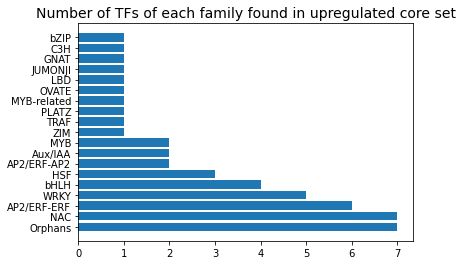

In [38]:
plt.barh(familycounts["Family"],familycounts["Count"])
plt.title("Number of TFs of each family found in upregulated core set",fontsize=14)
plt.savefig("../figures/upcore_fromsets_tf_families_barplot.pdf",bbox_inches="tight")

In [40]:
coretfs[coretfs["family"]=="NAC"]

,number for sorting purposes,protein name,family,gene ID,synonym,clone,all gene IDs,Unnamed: 7
1933,540040,ZmNAC40,NAC,Zm00001eb183190,NACTF40,pUT6157,GRMZM5G898290 Zm00001d050893 Zm00001eb183190,NaN
1942,540049,ZmNAC49,NAC,Zm00001eb062170,NACTF49,pUT6090,Zm00001eb062170 Zm00001d034601 GRMZM2G347043,NaN
1953,540060,ZmNAC60,NAC,Zm00001eb212120,NACTF60,NaN,GRMZM2G336533 Zm00001eb212120 Zm00001d013003,NaN
1954,540061,ZmNAC61,NAC,Zm00001eb415730,NACTF61,pUT6175,Zm00001eb415730 GRMZM2G003715 Zm00001d024543,NaN
2000,540109,ZmNAC109,NAC,Zm00001eb145580,NACTF109,pUT1169,Zm00001eb145580 GRMZM2G014653 Zm00001d042609,NaN
2008,540118,ZmNAC118,NAC,Zm00001eb334160,NACTF118,pUT4965,Zm00001d008399 Zm00001eb334160 GRMZM2G109627,NaN
2012,540122,ZmNAC122,NAC,Zm00001eb330850,NACTF122,NaN,GRMZM2G430849 Zm00001d022424 Zm00001eb330850,NaN
